In [1]:
# The program is set up to generate N neurons for the GPT-PINN. Once N neurons 
# has been achieved it is further trained to examine the largest loss 
# over all parameters once more. This is not needed for practical use.
# Set "train_final = False" (Line 60), if you wish to remove this behavior.

# Third-party and Standard Libraries
from datetime import datetime
import numpy as np
import torch
import time
import os
import matplotlib.pyplot as plt
print(f"Program Start: {datetime.now()}\n")

# Modules
from B_test import gpt_test, gpt_test_loss, pinn_test, pinn_test_loss
from B_test_lbfgs import gpt_test_lbfgs,gpt_test_loss_lbfgs
from B_data import residual_data, ICBC_data
from B_train import *
from B_train import pinn_train
from B_precomp import *
from B_models import NN

data_dir = "./b_data"
if (os.path.exists(data_dir) == False):
    os.makedirs(data_dir)

#torch.manual_seed(666)
#np.random.seed(666)
#device = torch.device("cuda")
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print_seperator = 60*"*"
device = torch.device("cpu")

b_test = np.loadtxt(data_dir + "/b_test.dat")
pinn_test_soln = np.loadtxt(data_dir+"/pinn_test_soln.dat")


Program Start: 2025-01-04 12:18:59.710134



In [2]:
params = np.load(data_dir+"/params_gpt.npy", allow_pickle=True).item()

# 解包变量
Xi, Xf, Ti, Tf = params["Domain"]["Xi"], params["Domain"]["Xf"], params["Domain"]["Ti"], params["Domain"]["Tf"]
Nc = params["Data sizes"]["Nc"]
N_test = params["Data sizes"]["N_test"]
BC_pts = params["Data sizes"]["BC_pts"]
IC_pts = params["Data sizes"]["IC_pts"]
tol = params["tol"]
layers_pinn = params["layers_pinn"]
lr_pinn = params["lr_pinn"]
epochs_pinn = params["epochs_pinn"]
parameter_size = params["parameter size"]
number_of_neurons = params["number_of_neurons"]
lr_gpt = params["lr_gpt"]
epochs_gpt_train = params["epochs_gpt_train"]
test_cases = params["test_cases"]
epochs_gpt_test = params["epochs_gpt_test"]
num_largest_mag = params["num_largest_mag"]

In [3]:
variables = torch.load(data_dir+"/variables_gpt.npy", map_location=torch.device('cpu'))

# 解包变量
c_initial = variables["c_initial"]
xt_size = variables["xt_size"]
IC_size = variables["IC_size"]
BC_size = variables["BC_size"]
IC_u = variables["IC_u"]
BC_u = variables["BC_u"]
train_out = variables["train_out"]
train_out_x = variables["train_out_x"]
train_out_t = variables["train_out_t"]
train_out_xx = variables["train_out_xx"]
train_out_IC = variables["train_out_IC"]
train_out_BC = variables["train_out_BC"]
fhat = variables["fhat"]
epochs_gpt_test = variables["epochs_gpt_test"]
lr_gpt = variables["lr_gpt"]
neurons = variables["neurons"]
out_test = variables["out_test"]

In [4]:
print("GPT-PINN Testing Started")
test_gpt_time,test_gpt_soln = gpt_test_lbfgs(b_test, xt_size, IC_size, BC_size, 
IC_u, BC_u, train_out, train_out_x, train_out_t, train_out_xx, train_out_IC, 
train_out_BC, fhat, epochs_gpt_test, lr_gpt, neurons, out_test,None,c_initial)

test_gpt_losses = gpt_test_loss_lbfgs(b_test, xt_size, IC_size, BC_size, IC_u, BC_u, 
train_out, train_out_x, train_out_t, train_out_xx, train_out_IC, train_out_BC, 
fhat, epochs_gpt_test, lr_gpt, neurons,None,c_initial)
print("GPT-PINN Testing Ended\n")

GPT-PINN Testing Started
GPT-PINN Testing Ended



In [5]:
params = np.load(data_dir+"/params_sgpt.npy", allow_pickle=True).item()

# 解包变量
Xi, Xf, Ti, Tf = params["Domain"]["Xi"], params["Domain"]["Xf"], params["Domain"]["Ti"], params["Domain"]["Tf"]
Nc = params["Data sizes"]["Nc"]
N_test = params["Data sizes"]["N_test"]
BC_pts = params["Data sizes"]["BC_pts"]
IC_pts = params["Data sizes"]["IC_pts"]
tol = params["tol"]
layers_pinn = params["layers_pinn"]
lr_pinn = params["lr_pinn"]
epochs_pinn = params["epochs_pinn"]
parameter_size = params["parameter size"]
number_of_neurons = params["number_of_neurons"]
lr_gpt = params["lr_gpt"]
epochs_gpt_train = params["epochs_gpt_train"]
test_cases = params["test_cases"]
epochs_gpt_test = params["epochs_gpt_test"]
num_largest_mag = params["num_largest_mag"]

In [6]:
variables = torch.load(data_dir+"/variables_sgpt.npy", map_location=torch.device('cpu'))

# 解包变量
c_initial = variables["c_initial"]
xt_size = variables["xt_size"]
IC_size = variables["IC_size"]
BC_size = variables["BC_size"]
IC_u = variables["IC_u"]
BC_u = variables["BC_u"]
train_out = variables["train_out"]
train_out_x = variables["train_out_x"]
train_out_t = variables["train_out_t"]
train_out_xx = variables["train_out_xx"]
train_out_IC = variables["train_out_IC"]
train_out_BC = variables["train_out_BC"]
fhat = variables["fhat"]
epochs_gpt_test = variables["epochs_gpt_test"]
lr_gpt = variables["lr_gpt"]
neurons = variables["neurons"]
out_test = variables["out_test"]
Lhat = variables["Lhat"]

In [7]:
print("GPT-PINN Testing Started")
test_sgpt_time, test_sgpt_soln = gpt_test_lbfgs(b_test, xt_size, IC_size, BC_size, 
IC_u, BC_u, train_out, train_out_x, train_out_t, train_out_xx, train_out_IC, 
train_out_BC, fhat, epochs_gpt_test, lr_gpt, neurons, out_test,Lhat,c_initial)

test_sgpt_losses = gpt_test_loss_lbfgs(b_test, xt_size, IC_size, BC_size, IC_u, BC_u, 
train_out, train_out_x, train_out_t, train_out_xx, train_out_IC, train_out_BC, 
fhat, epochs_gpt_test, lr_gpt, neurons,Lhat,c_initial)
print("GPT-PINN Testing Ended\n")

GPT-PINN Testing Started
GPT-PINN Testing Ended



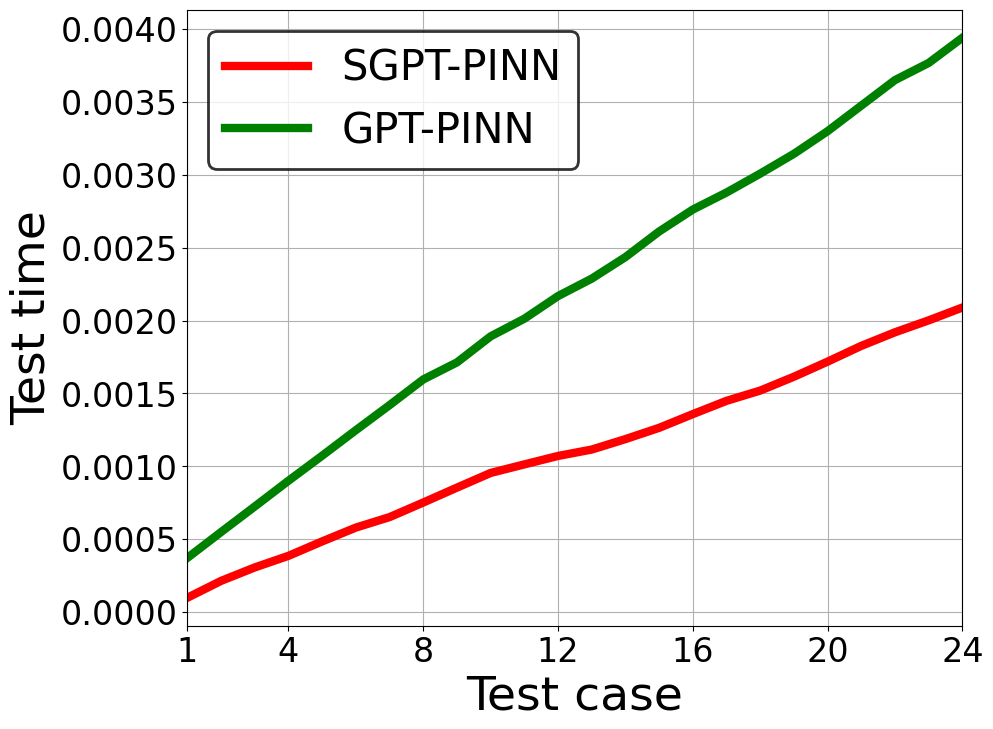

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_sgpt_time.shape[0]+1) 
x_ticks = list(range(0,test_sgpt_time.shape[0]+1,4))
x_ticks[0] = 1
ax.plot(x_plt16, test_sgpt_time, color="red",   label="SGPT-PINN", lw=6)
ax.plot(x_plt16, test_gpt_time,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("Test time", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()
#plt.yscale('log')
plt.show()

In [9]:
np.savetxt(data_dir+f"/test_gpt_losses.dat", test_gpt_losses)
np.savetxt(data_dir+f"/test_gpt_soln.dat",   test_gpt_soln)
np.savetxt(data_dir+f"/test_gpt_time.dat",   test_gpt_time)

np.savetxt(data_dir+f"/test_bic_sgpt_losses.dat", test_sgpt_losses)
np.savetxt(data_dir+f"/test_bic_sgpt_soln.dat",   test_sgpt_soln)
np.savetxt(data_dir+f"/test_bic_sgpt_time.dat",   test_sgpt_time)